# Example: modeling changes in population size

## Simple example

Let's look at an example:

In [1]:
%matplotlib inline
%pylab inline
from __future__ import print_function
import numpy as np
import array
import matplotlib.pyplot as plt
#population size
N=1000
#nlist corresponds to a constant population size for 10N generations
#note the "dtype" argument.  Without it, we'd be defaulting to int64,
#which is a 64-bit signed integer.
nlist=np.array([N]*(10*N),dtype=np.uint32)
#This is a 'view' of the array starting from the beginning:
nlist[0:]

Populating the interactive namespace from numpy and matplotlib


array([1000, 1000, 1000, ..., 1000, 1000, 1000], dtype=uint32)

## A simple bottleneck

In order to change population size, one simply has to change the values in the "nlist".   For example, here is a population bottleneck:

(0, 1500.0)

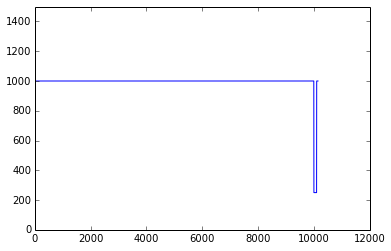

In [2]:
#Evolve for 10N generations,
#bottleneck to 0.25N for 100 generations,
#recover to N for 50 generations
nlist = np.concatenate(([N]*(10*N),[int(0.25*N)]*100,[N]*50)).astype(np.int32)
plt.plot(nlist[0:])
plt.ylim(0,1.5*N)

Please note the last command, which changes the concatenated array from an array of 64 bit signed integers to 32 bit unsigned integers.

## Exponential growth

Now, let's do population growth, where we evolve for 10N generations, and then grow the population five fold in the next 500 generations.

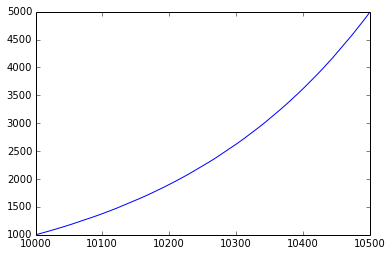

In [3]:
import math
N2=5*N
tgrowth=500
#G is the growth rate
G = math.exp( (math.log(N2)-math.log(N))/float(tgrowth) )
nlist = np.array([N]*(10*N+tgrowth),dtype=np.uint32)
#Now, modify the list according to expoential growth rate
for i in range(tgrowth):
     nlist[10*N+i] = round( N*math.pow(G,i+1) )
##Now, we see that the population does grown from
##N=1,000 to N=5,000 during the last 500 generations
## We need the + 1 below to transform
## from the generation's index to the generation itself
plt.plot(range(10*N+1,10*N+501,1),nlist[10*N:])

## Potential caveat

* Getting the integer type incorrect.  With numpy, it must by dtype=uint32.  With array.array, it must be 'I'.  Getting it wrong will result in a run-time error.

## Rationale

Why do things with [NumPy](http://www.numpy.org) arrays or Python's array.array?  Lots of reasons:

1. They are fast
2. The uint32 is the same type used in [fwdpp](http://molpopgen.github.io/fwdpp)
3. The 32 bit integer takes half the memory as the default 64 bit intger type of a Python list.
4. Cython lets us directly pass the underlying data to C++, eliminating the need for a copy when going from Python to C++.